In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection


import time
from IPython import display

mnist = tf.keras.datasets.mnist

plt.rcParams['figure.figsize'] = 12, 9

# Plan de Classification
[x] Intro Classification

[x] Perceptron

[x] Multilayer

[ ] Other models (SVM, Bayesian...)


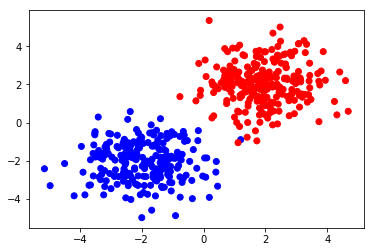

In [6]:
# Creating some toy data

centroids = np.array([[-2, -2], [2, 2]])
labels = np.array([0, 1])
x = []
y = []

n = 500

for p, l in zip(centroids, labels):
    x.extend( np.concatenate((np.random.normal(p[0], 1, n//2), 
                              np.random.normal(p[1], 1, n//2))).reshape(2, n//2).T)
    y.extend([l] * (n//2))
    
x = np.array(x)
y = np.array(y)
colours = ['b' if l==0 else 'r' for l in y]
plt.scatter(x[..., 0], x[..., 1], c=colours)
plt.show()

## Perceptron

Modèle très simple en 2 dimensions :
![Perceptron](img/perceptron.png)

* $x_1$ et $x_2$ les coordonnées d'un point
* $w_1$, $w_2$ et $b$ les paramètres du modèle
* $f$ est la fonction heaviside ($0$ si $x < 0$, $1$ sinon)
* $y$ est la sortie du modèle pour l'entrée $\textbf{x}$

Une prédiction est donnée par l'équatioin suivante:
$$
y = f(\sum_i w_i \cdot x_i + b)
$$

On utilise l'équation d'apprentissage suivante :
$$
\theta^{n+1} = \theta^n - \eta\nabla_\theta E(y, t)
$$

Où $E$ désigne l'erreur commise par le modèle :
$$
E(y, t) = \frac{1}{2}(y - t)^2
$$

L'équation d'apprentissage provient de la descente de gradient : pour minimiser l'erreur on suit l'opposé de la «direction» donnée par le gradient de l'erreur par rapport aux paramètres du modèle.
Exemple : 
$$
\frac{\partial E}{\partial w_1} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial w_1}
$$
$$
\frac{\partial E}{\partial w_1} = (y-t) \times x_1
$$


In [28]:
# Perceptron
"""
Ici on va tout coder de bout en bout pour un modèle simple.
"""
W = np.random.normal(0, 1, (2,))
b = np.zeros(1)

def reset_weights():
    W = np.random.normal(0, 1, (2,))
    b = np.zeros(1)

def haversine(z):
    return np.where(z >= 0, 1, 0)

def predict_class_perceptron(X):
    return haversine(W.dot(X) + b)

def gradient(X, t):
    """Should return """
    pred = predict_class_perceptron(X)
    return (pred - t) * X, pred - t 



In [29]:
def plot_discriminator(predict_f, x, y):
    """ 
    Plot a weight vector w = [w_0,w_1,w_2] as a colour map
    """
    
    xx,yy = np.mgrid[-5:5:.1,-5:5:0.1]

    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = predict_f([xx[i,j], yy[i,j]])
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])    
    plt.scatter(x[..., 0], x[..., 1], 20, colours)
    plt.show()
    

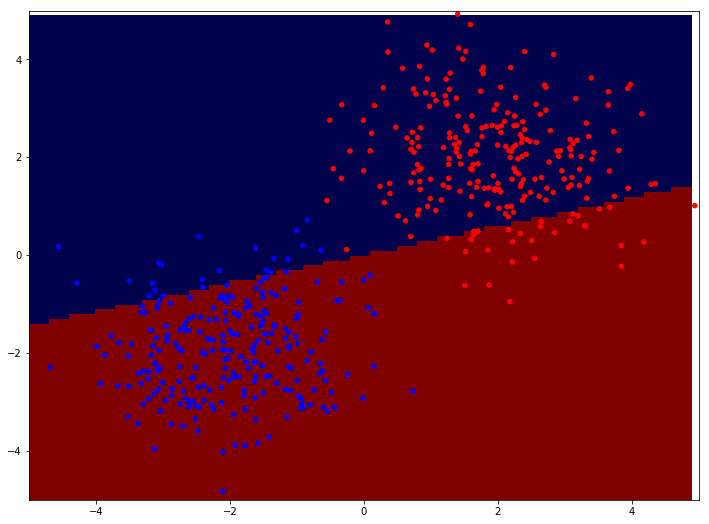

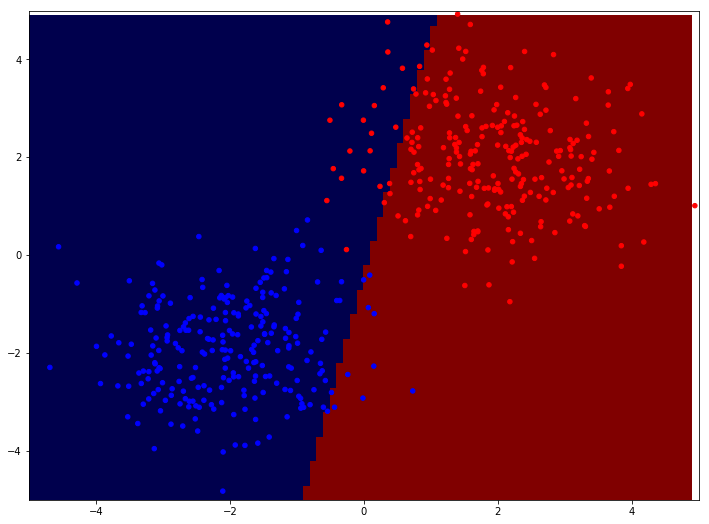

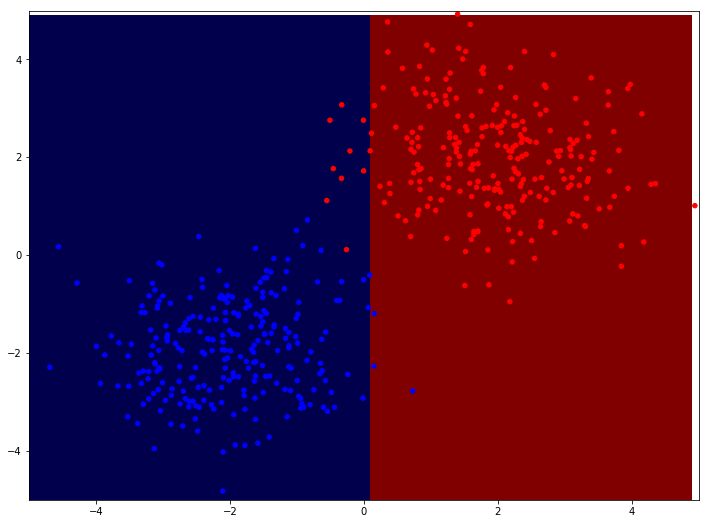

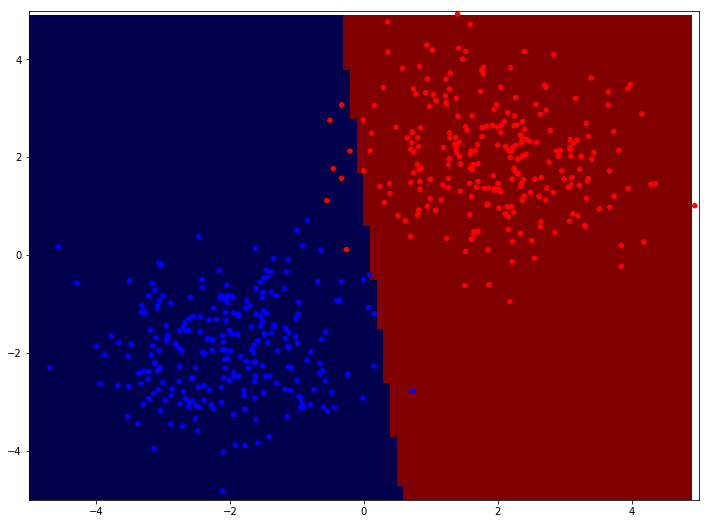

Epoch 0, accuracy=0.92


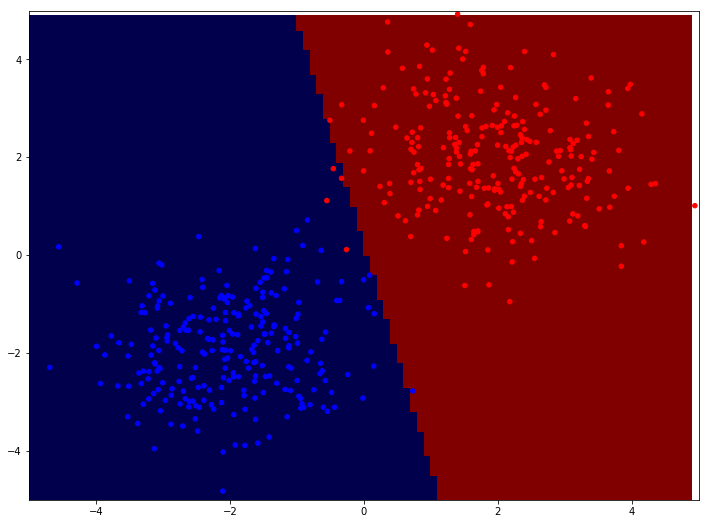

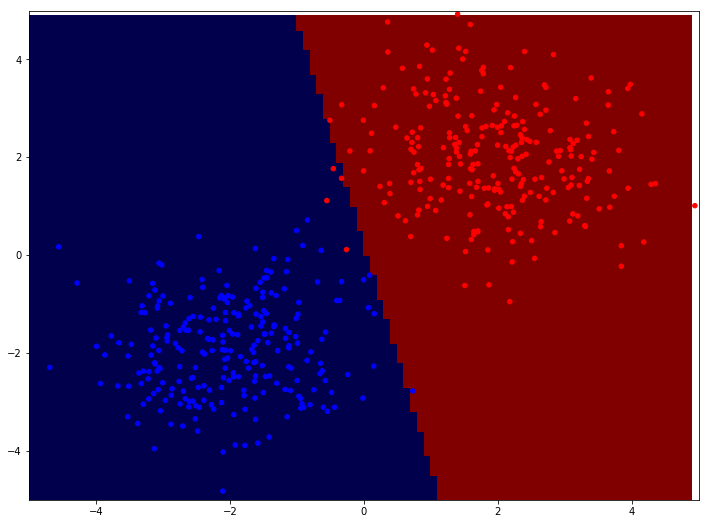

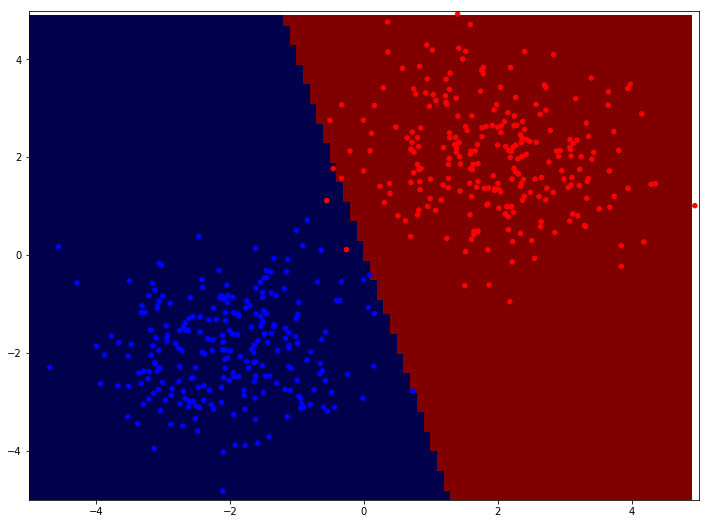

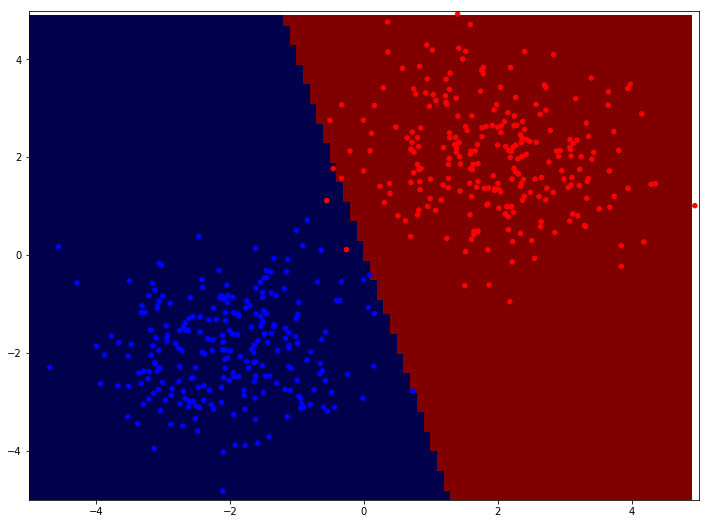

Epoch 1, accuracy=0.995


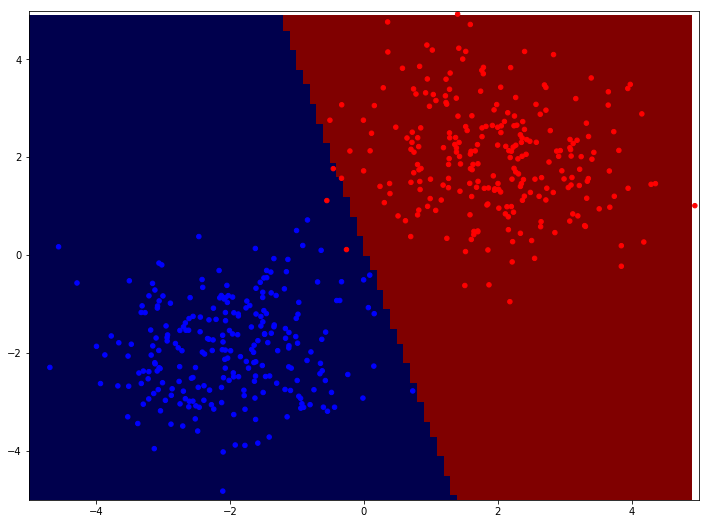

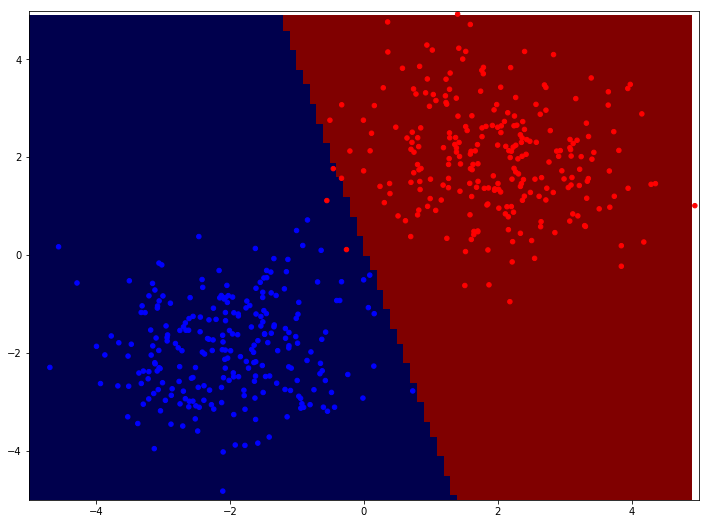

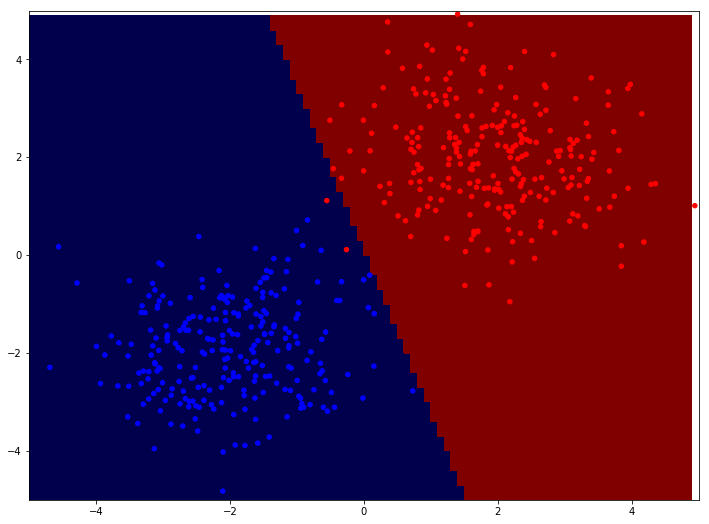

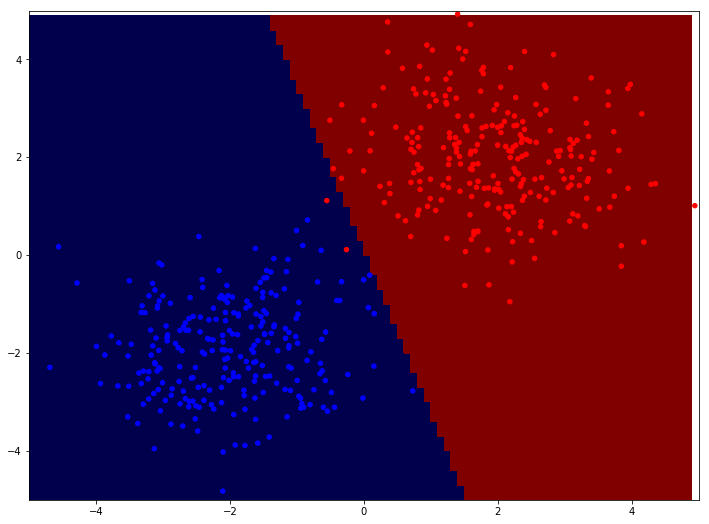

Epoch 2, accuracy=0.9975


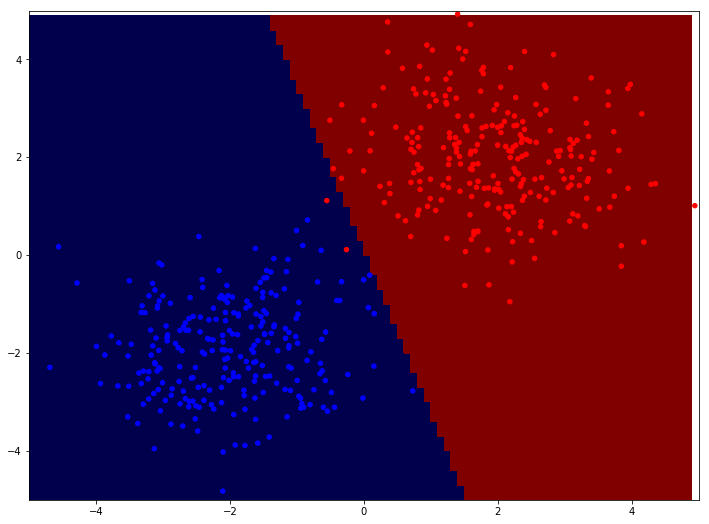

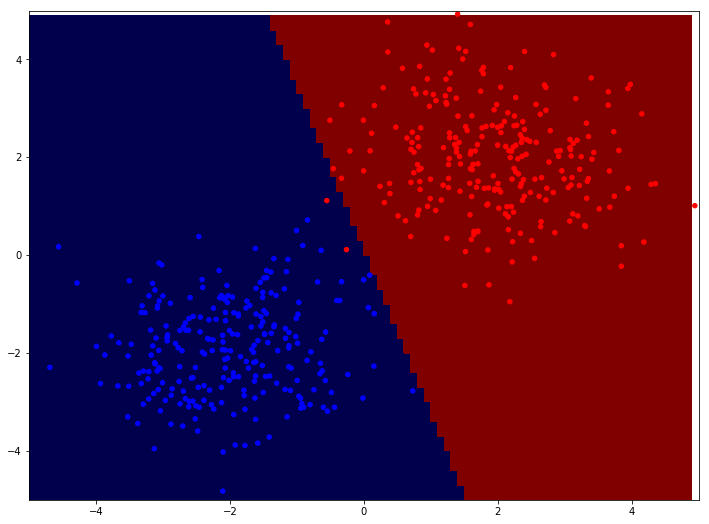

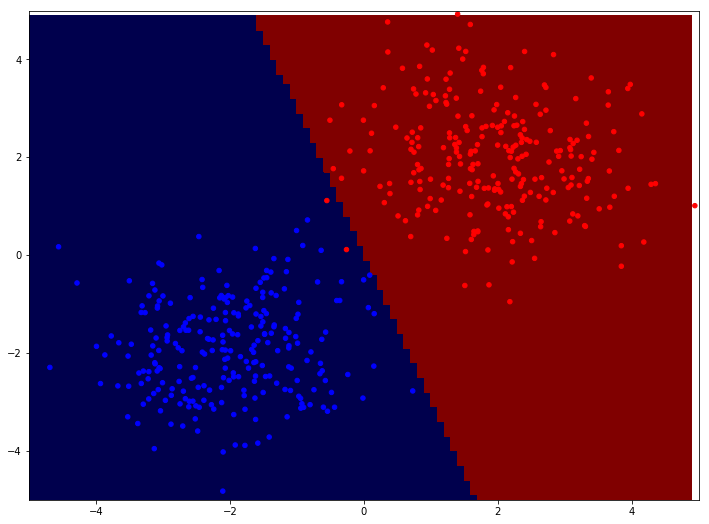

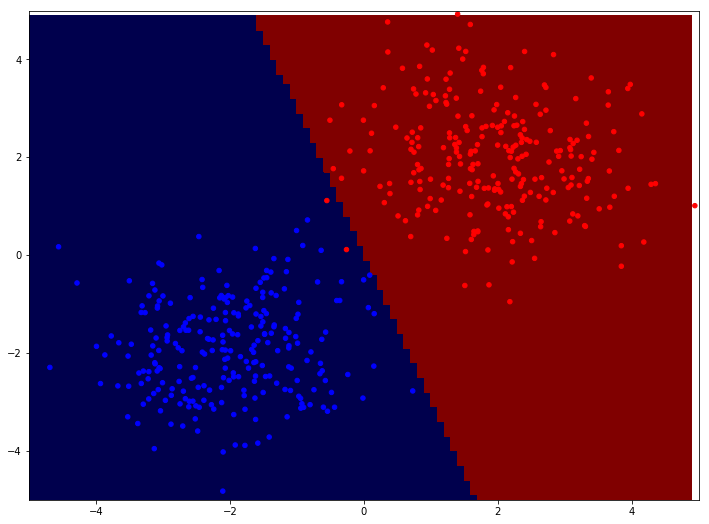

Epoch 3, accuracy=0.995


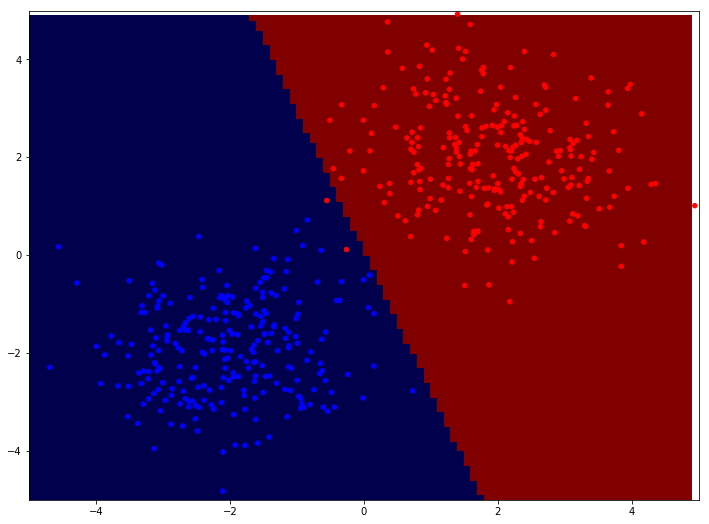

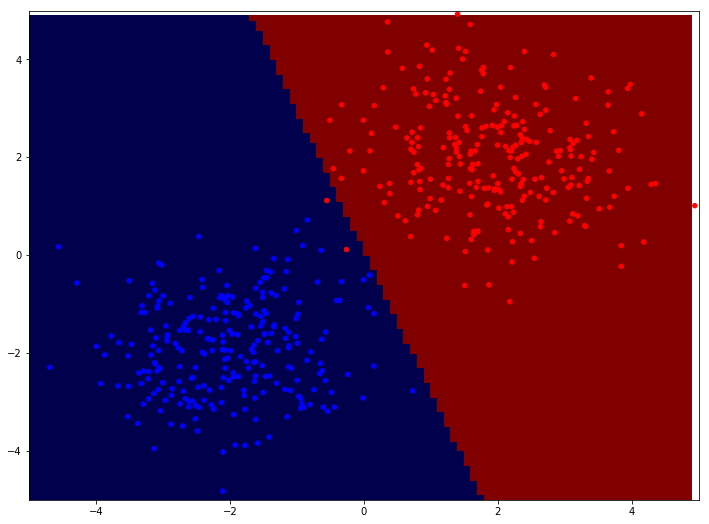

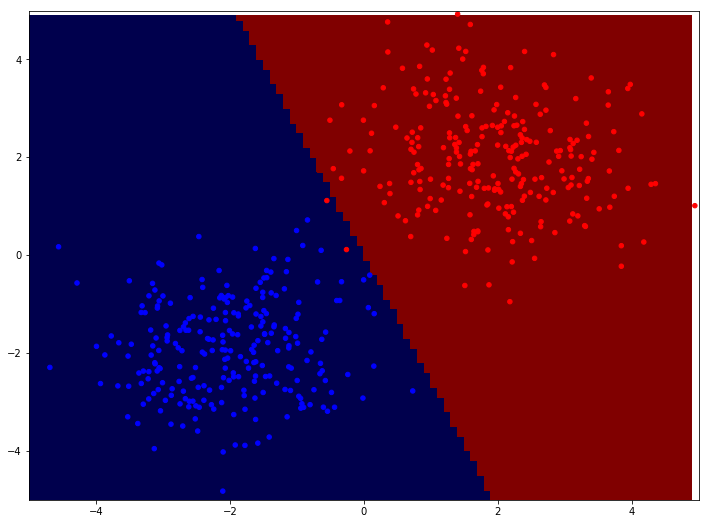

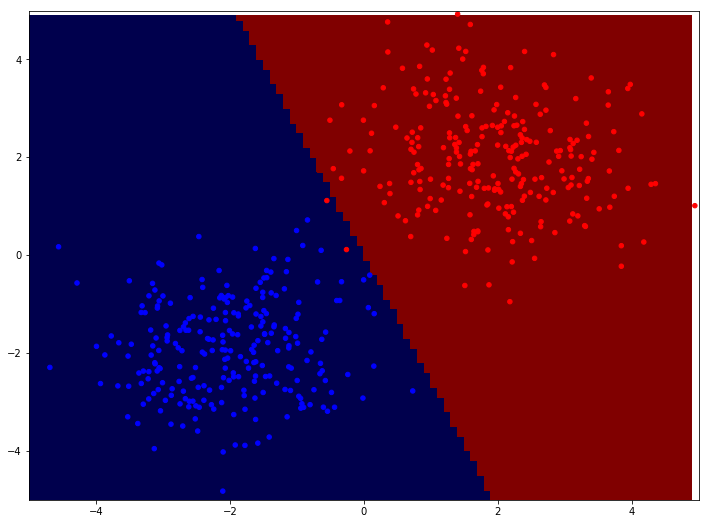

Epoch 4, accuracy=0.9975


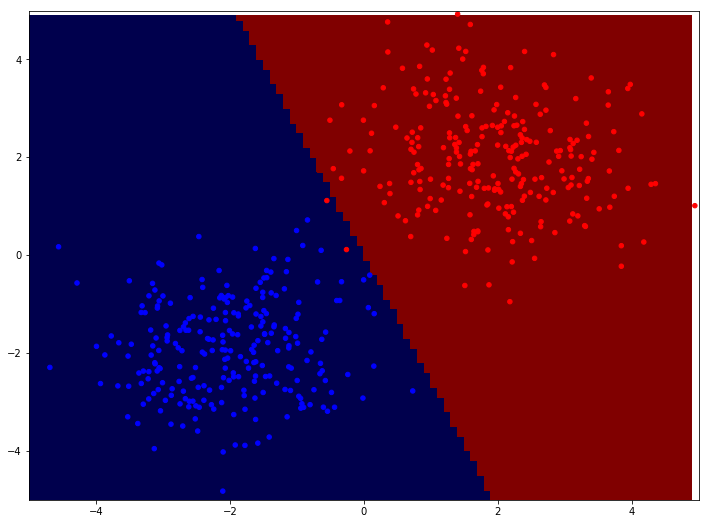

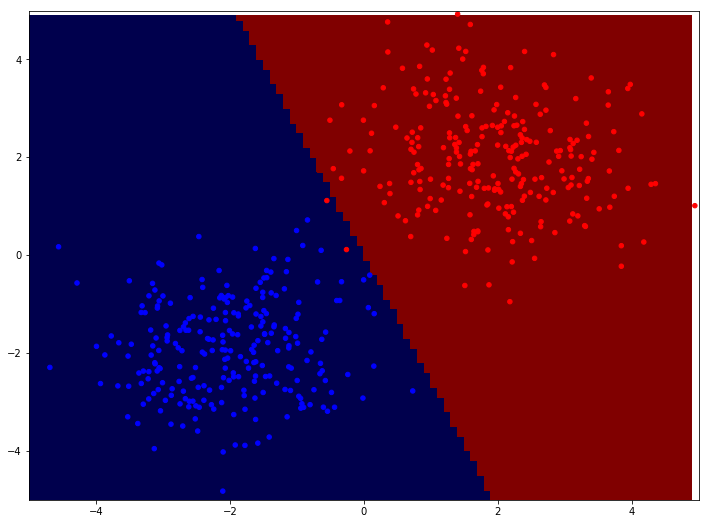

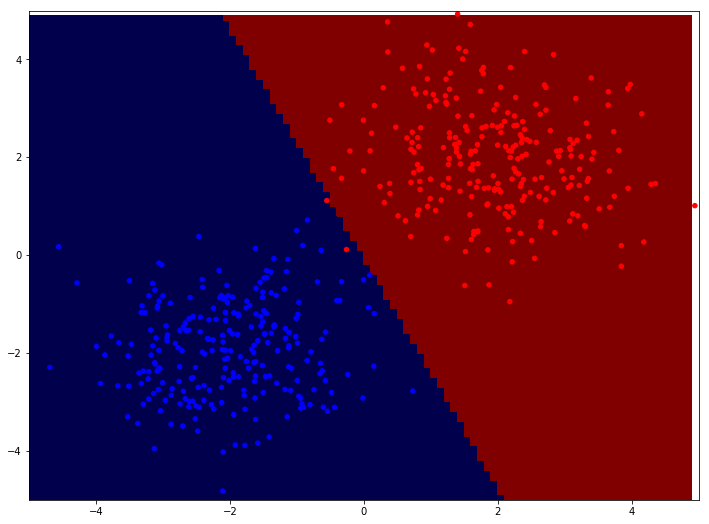

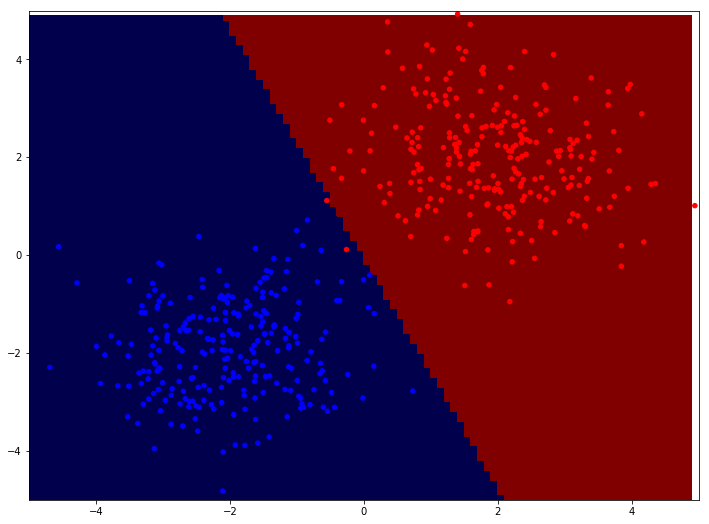

Epoch 5, accuracy=0.995


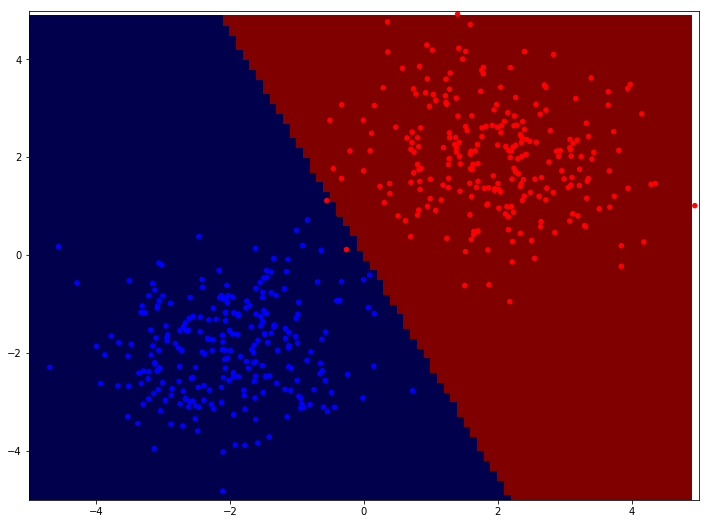

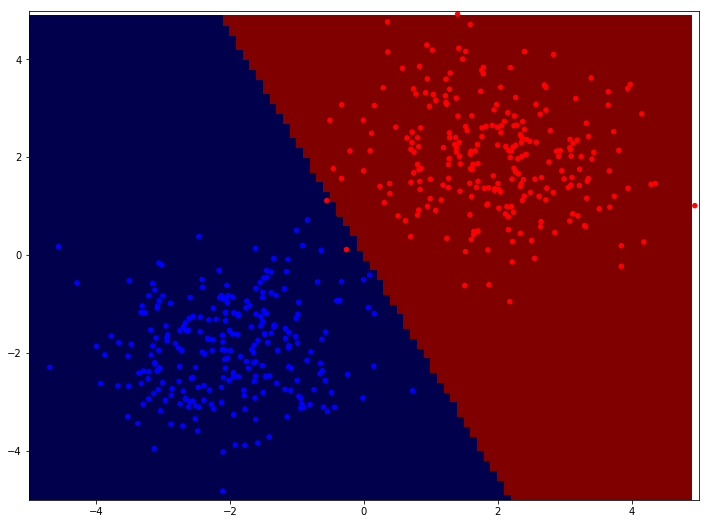

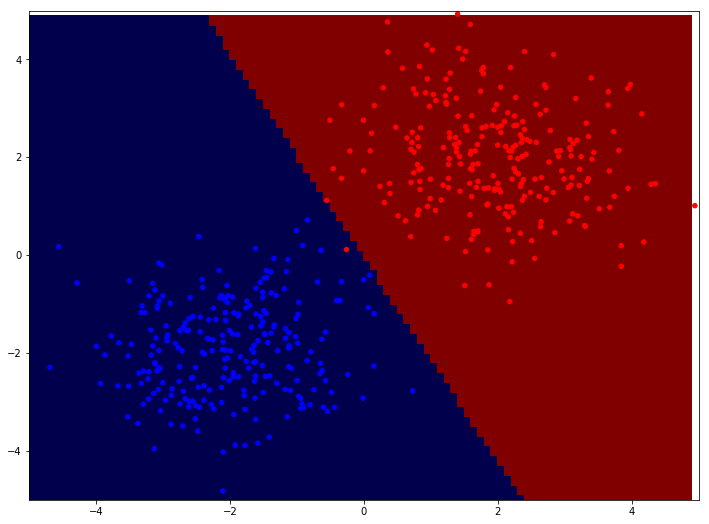

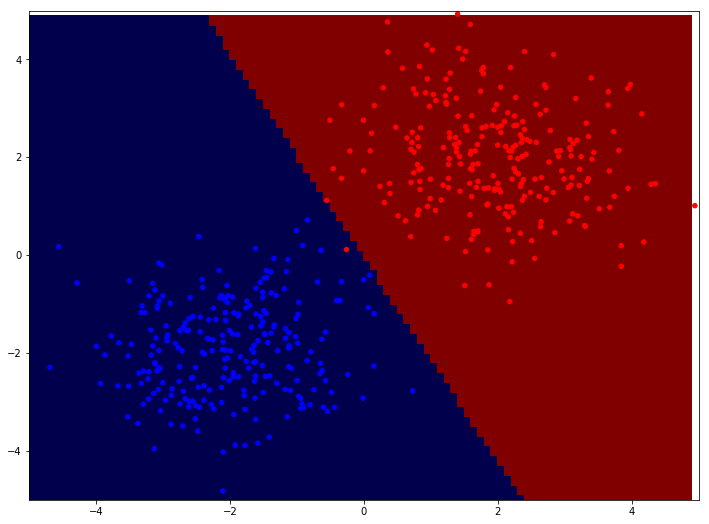

Epoch 6, accuracy=0.9975


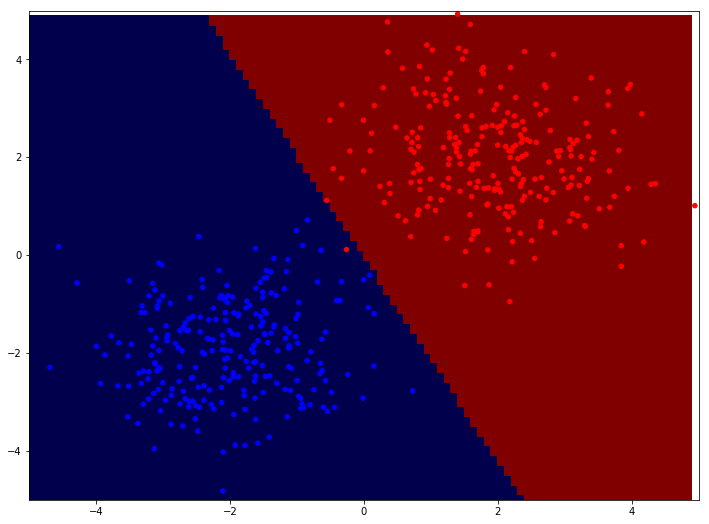

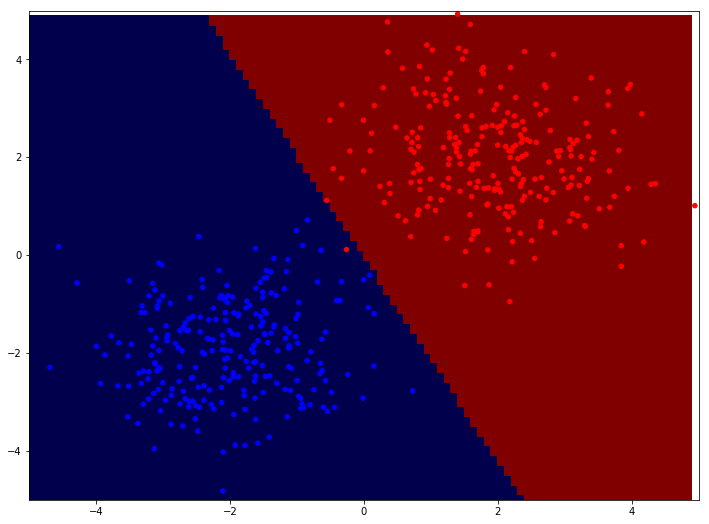

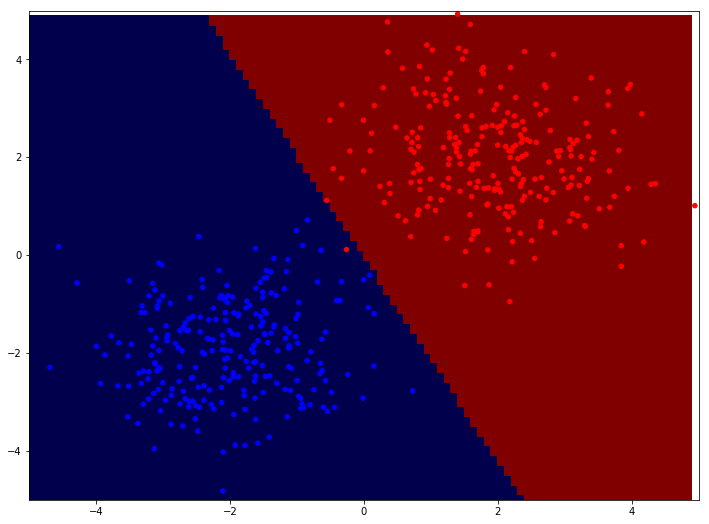

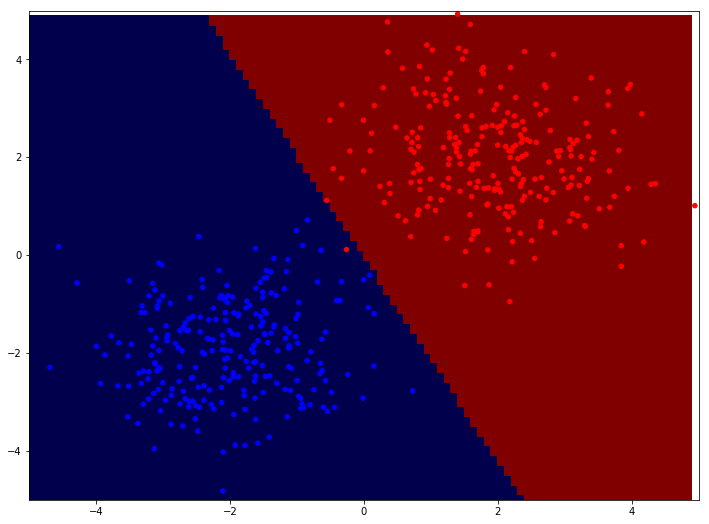

Epoch 7, accuracy=1.0


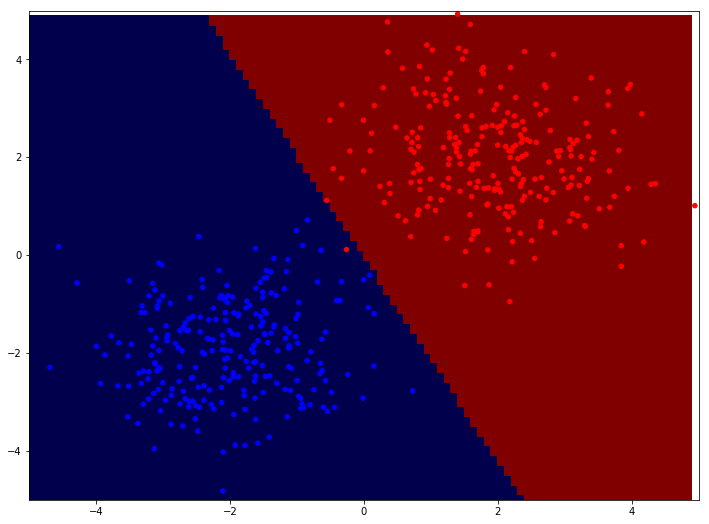

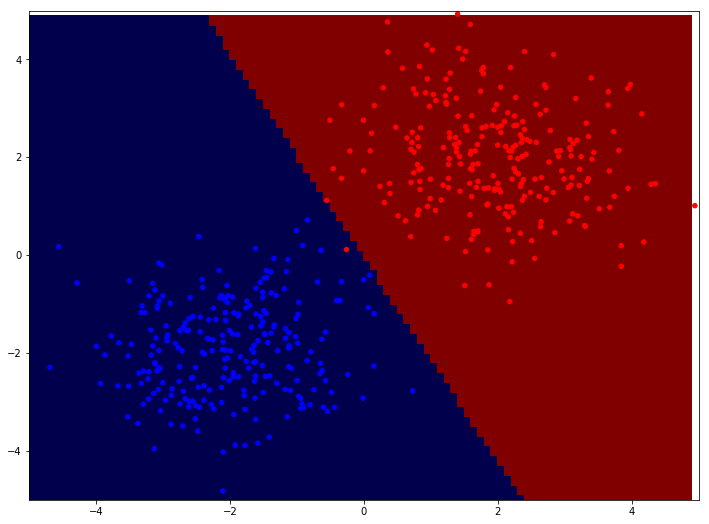

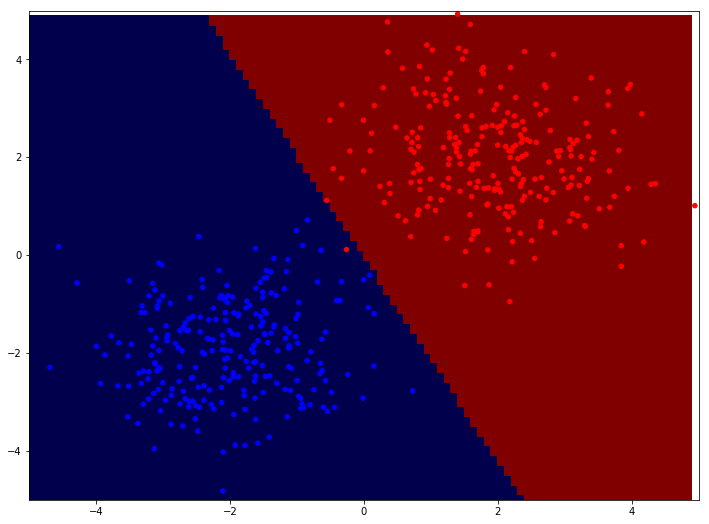

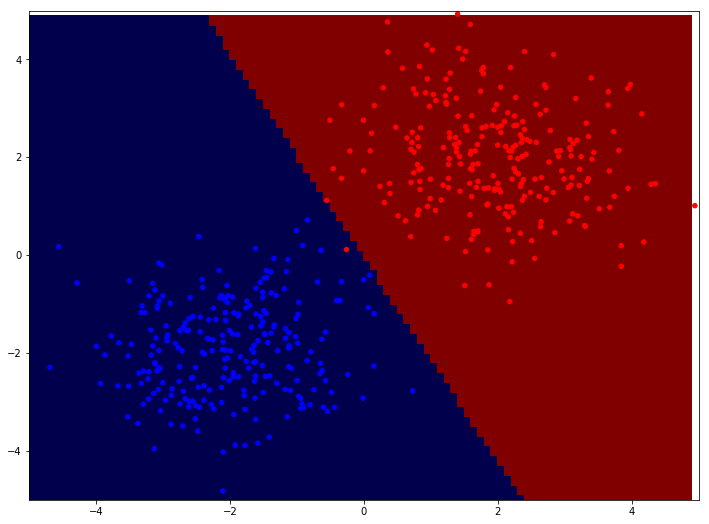

Epoch 8, accuracy=1.0


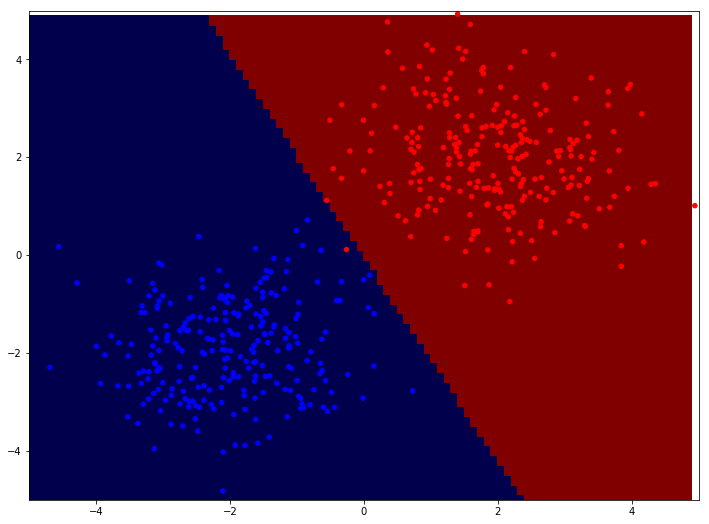

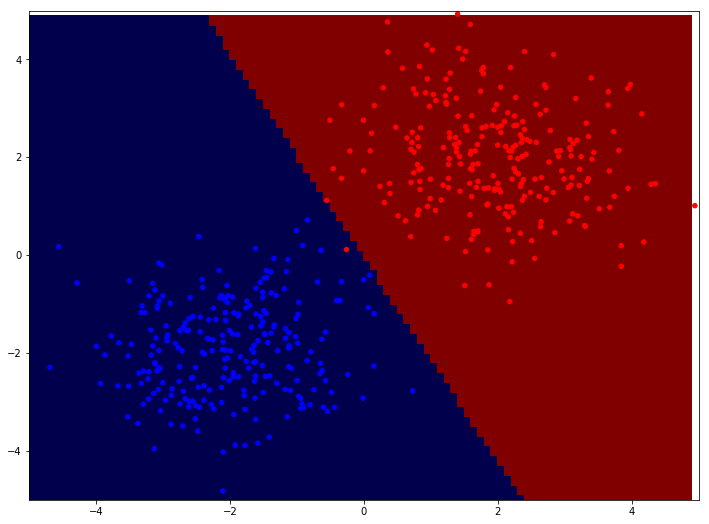

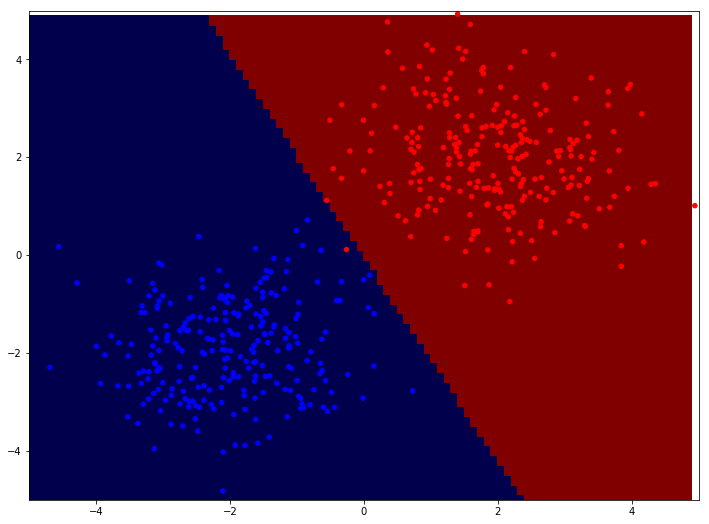

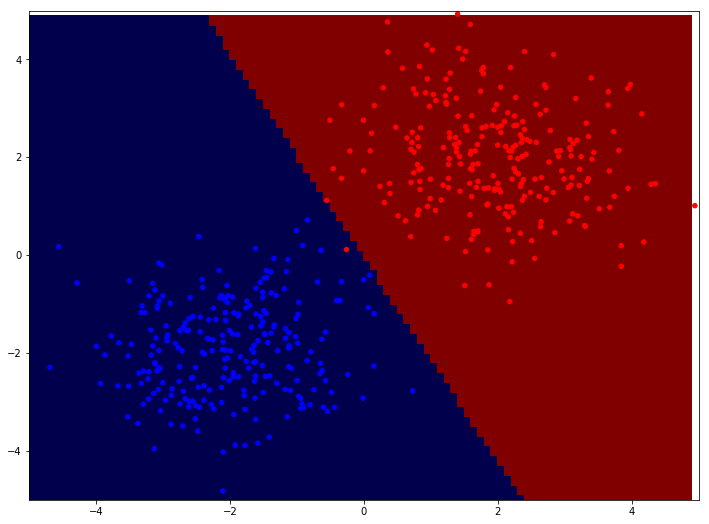

Epoch 9, accuracy=1.0


In [6]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
learning_rate = 0.005
plotme = True

reset_weights()

for e in range(10):
    count = 0
    correct, tot = 0, 0
    for xt, yt in zip(x_train, y_train):
        
        if predict_class_perceptron(xt) != yt:
            # TODO : remove here
            # update the model !
            dw, db = gradient(xt, yt)
            W -= learning_rate * dw
            b -= learning_rate * db
        else:
            correct += 1
        tot += 1
        
        if plotme and count % 100==0:
            plot_discriminator(predict_class_perceptron, x, y)
        count += 1
    print(f"Epoch {e}, accuracy={correct/tot}")
    
# Evaluate model on test set ! Compare with train set


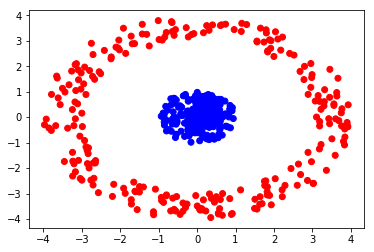

In [7]:
r = [[0.1, 1], [3, 4]]

x2 = []
y2 = []

for (r_min, r_max), l in zip(r, labels):
    rr = np.random.uniform(r_min, r_max, n//2)
    theta = np.random.uniform(0, 2*np.pi, n//2)
    x2.extend( np.concatenate((rr * np.cos(theta), 
                              rr * np.sin(theta))).reshape(2, n//2).T)
    y2.extend([l] * (n//2))
    
x2 = np.array(x2)
y2 = np.array(y2)

plt.scatter(x2[:,0], x2[:,1], c=colours)


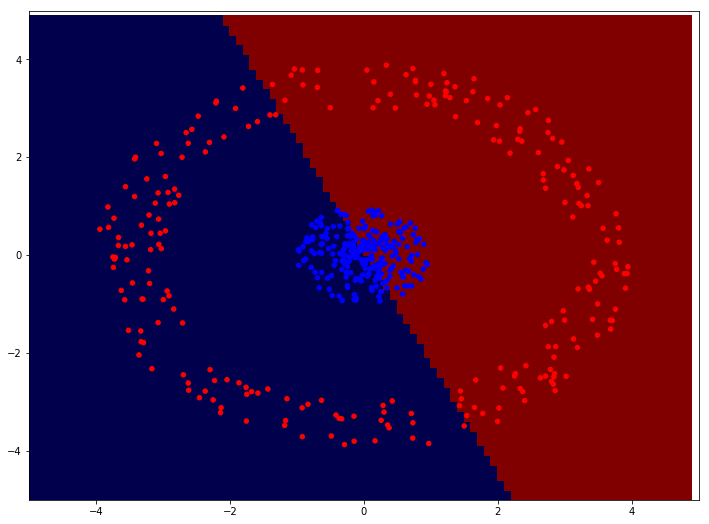

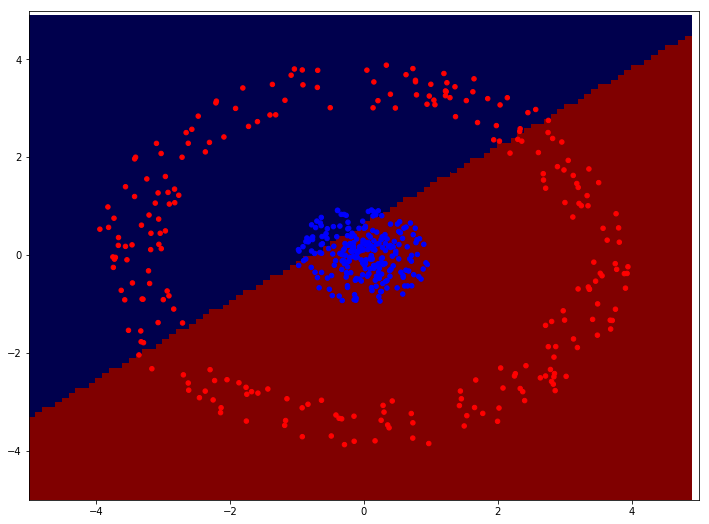

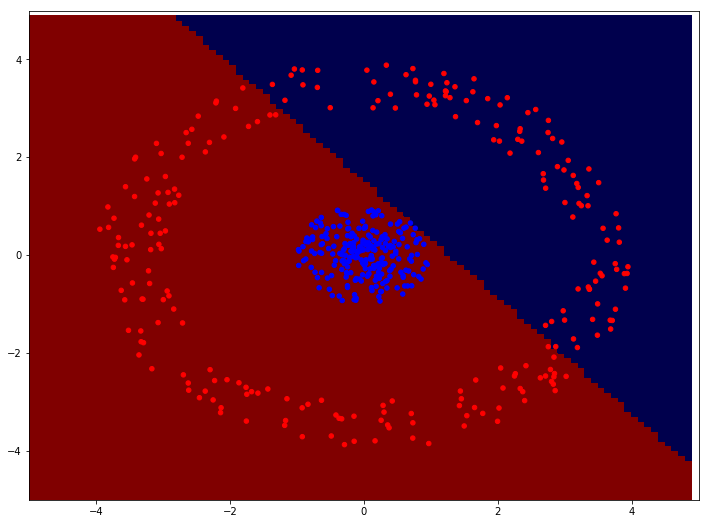

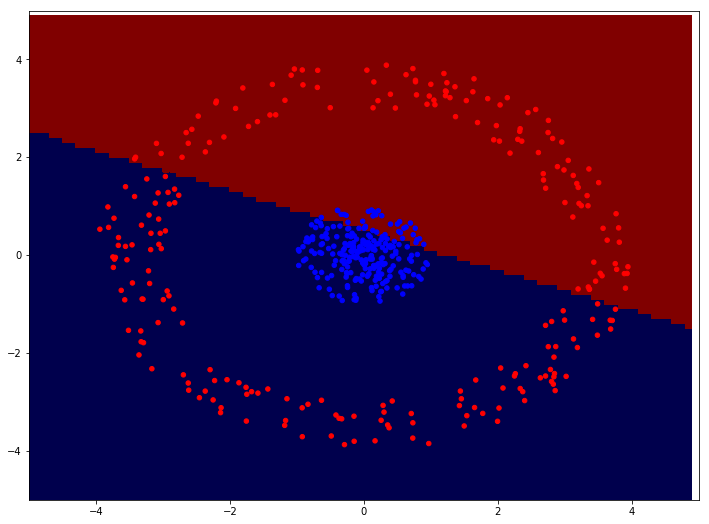

Epoch 0, accuracy=0.51


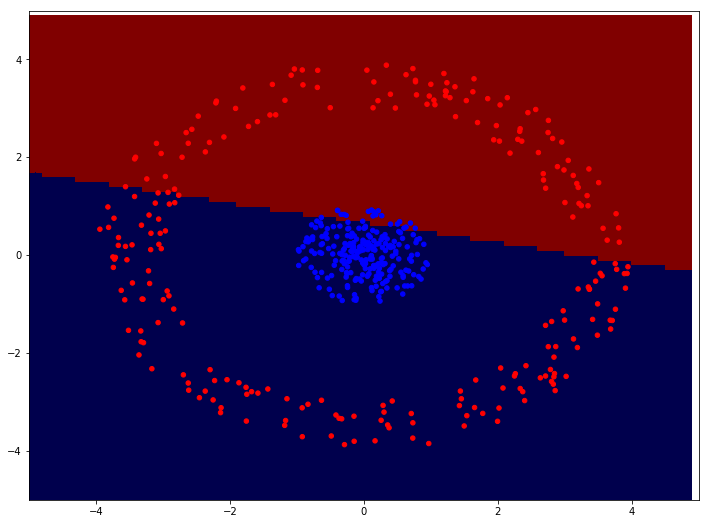

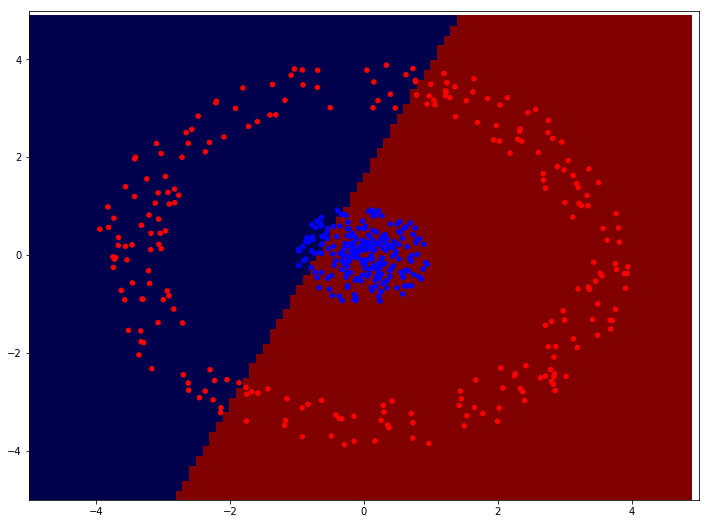

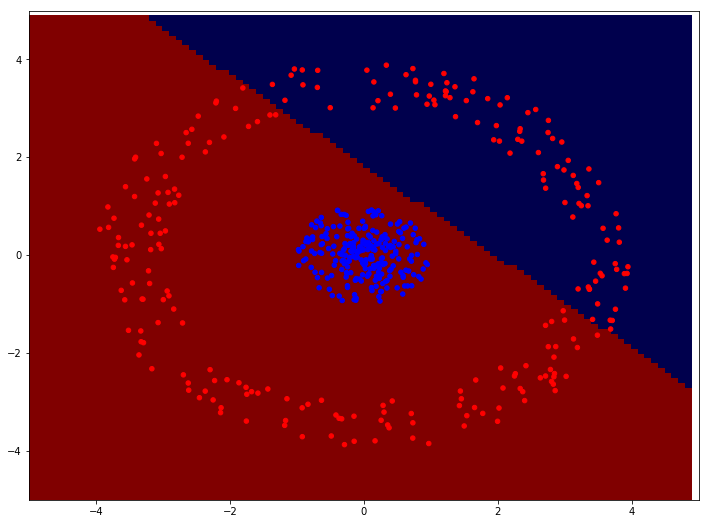

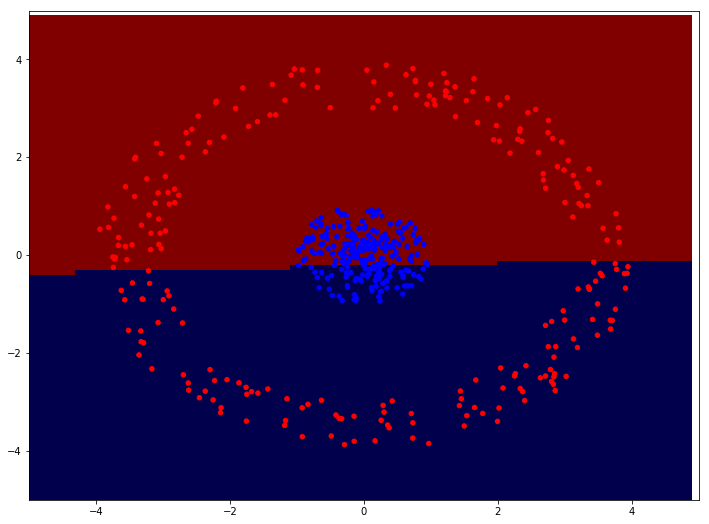

Epoch 1, accuracy=0.5025


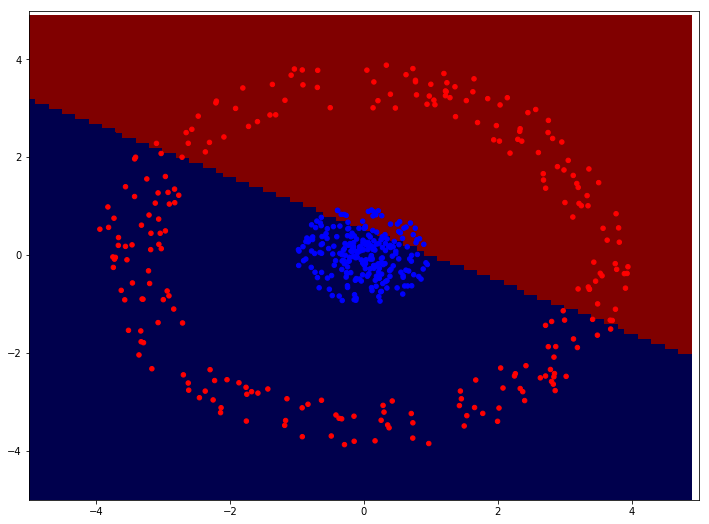

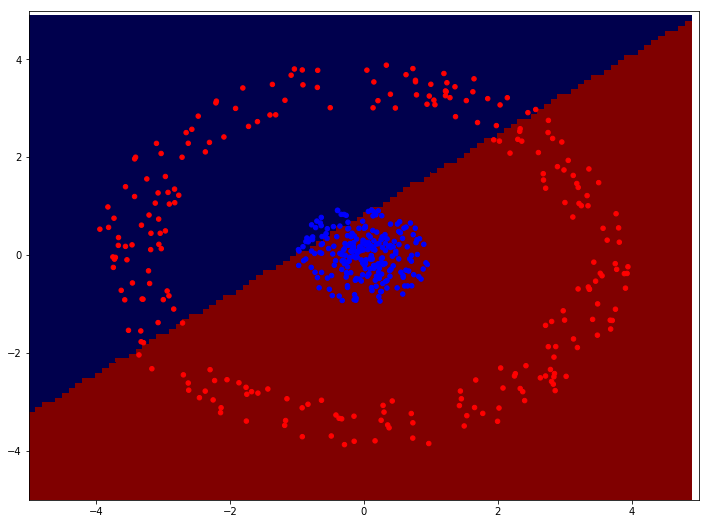

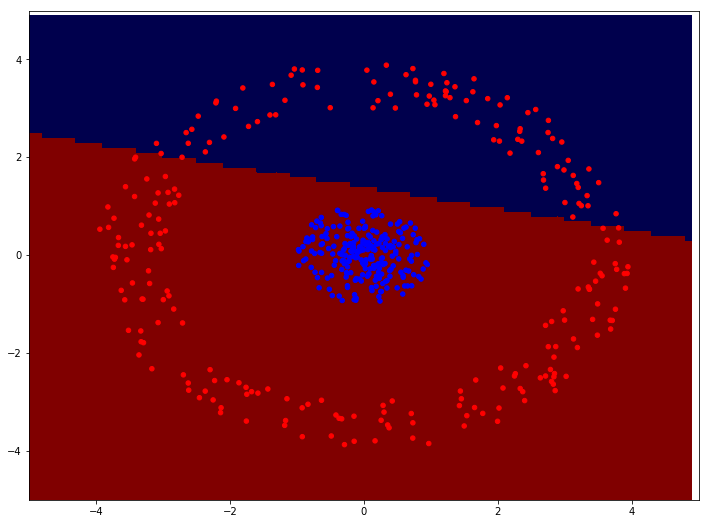

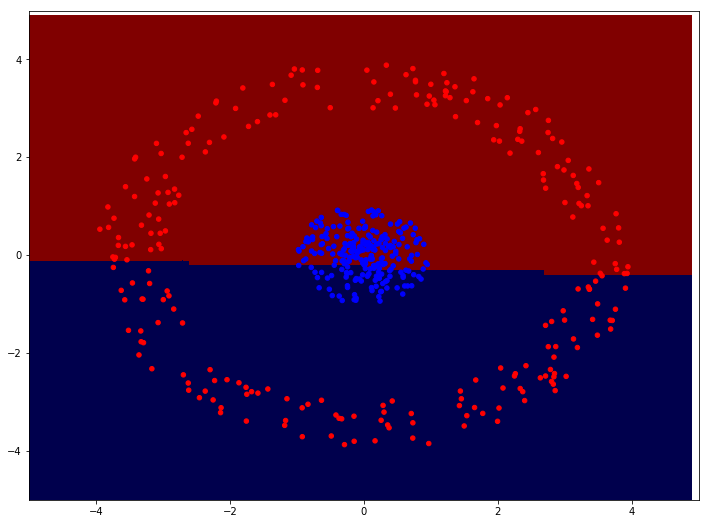

Epoch 2, accuracy=0.54


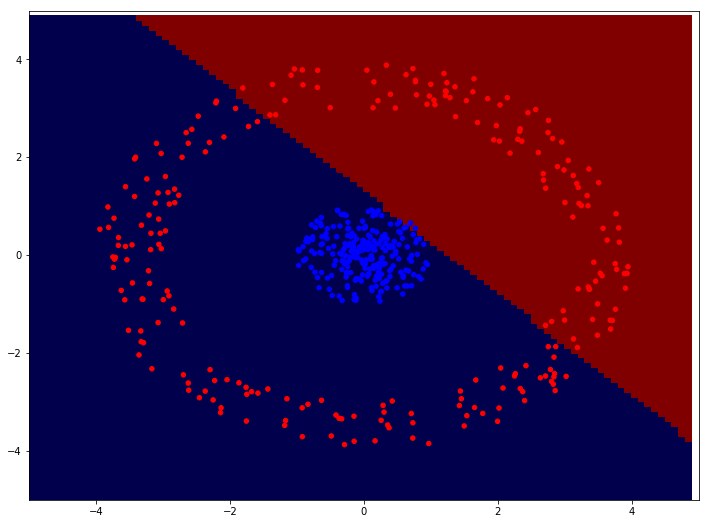

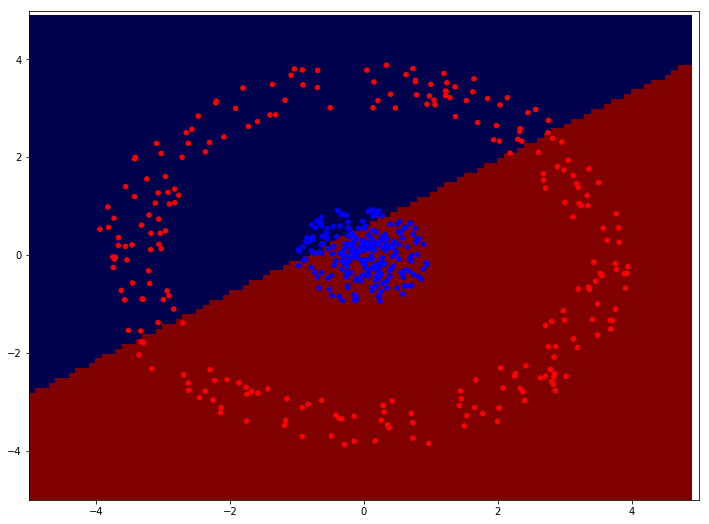

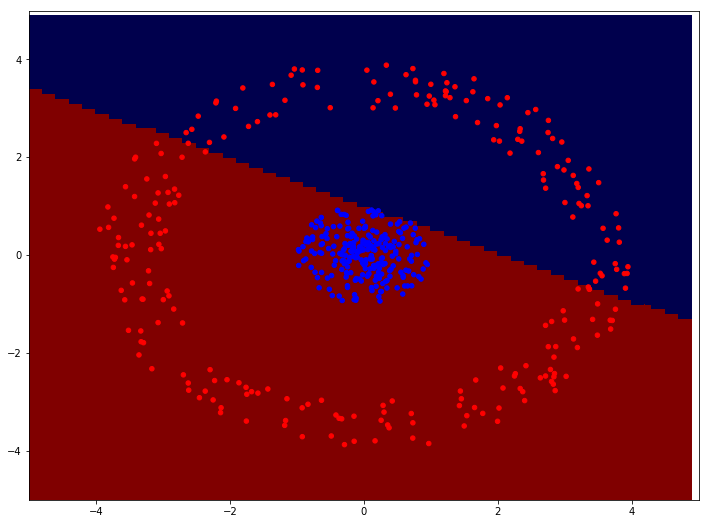

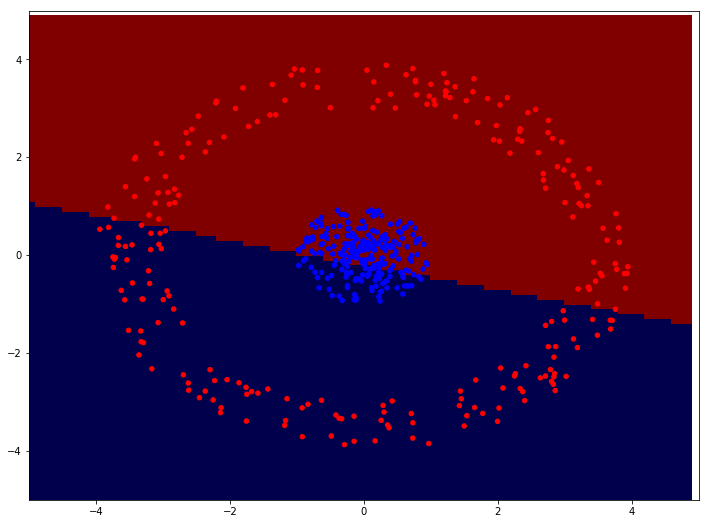

Epoch 3, accuracy=0.505


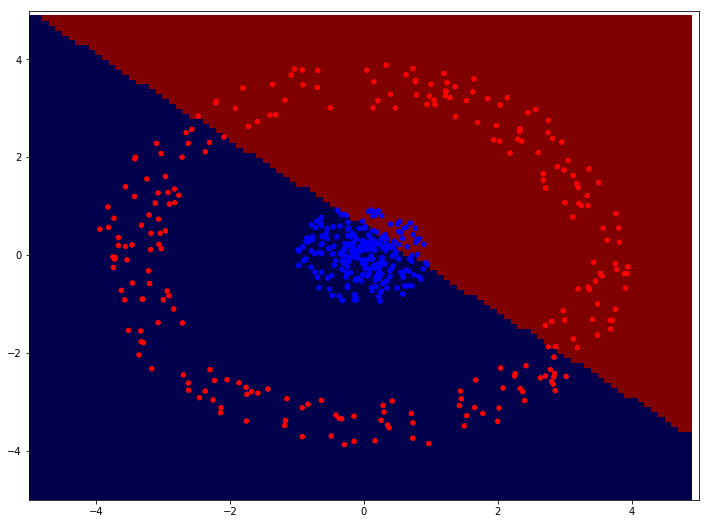

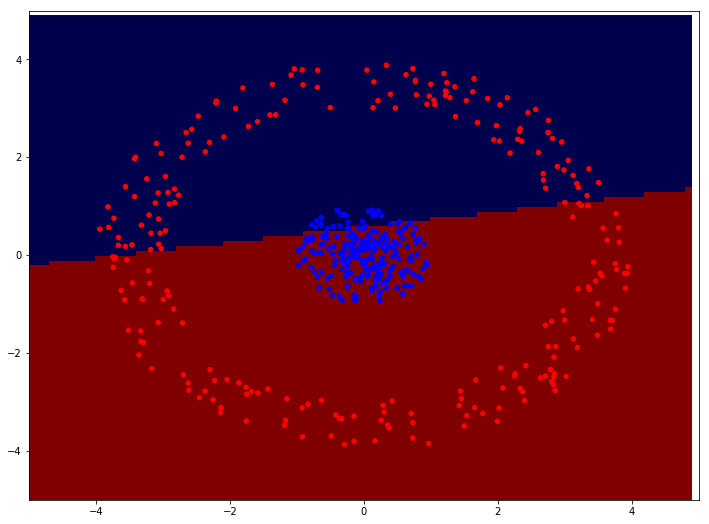

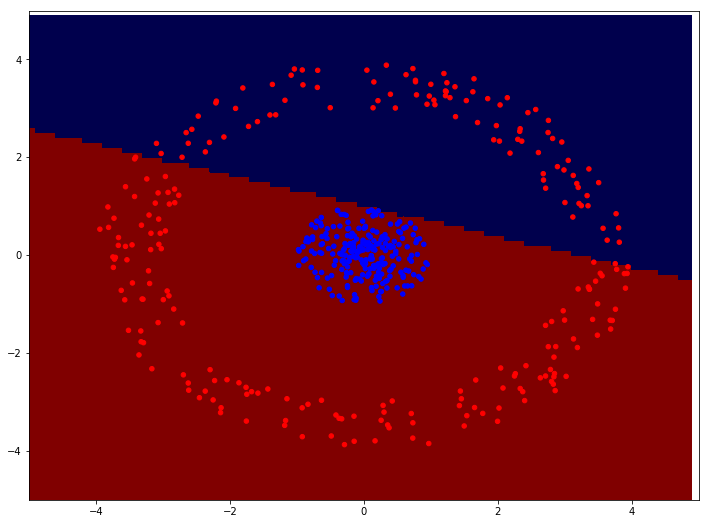

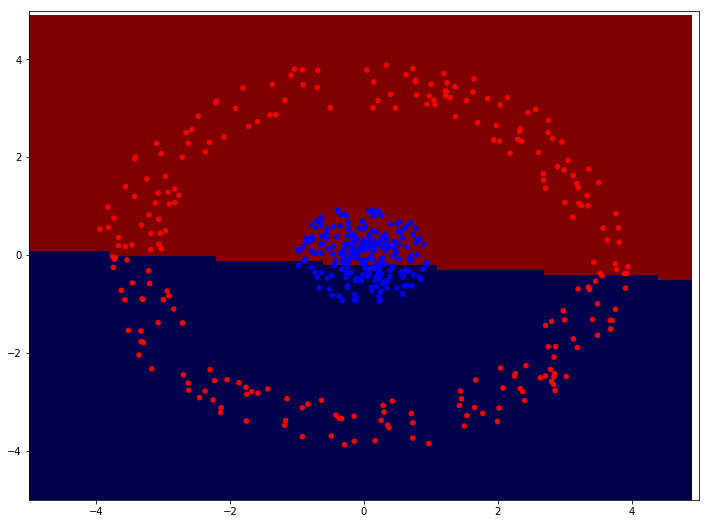

Epoch 4, accuracy=0.535


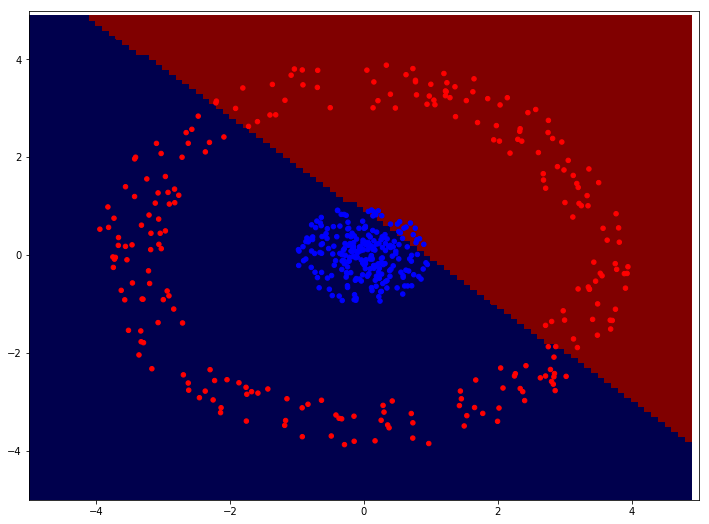

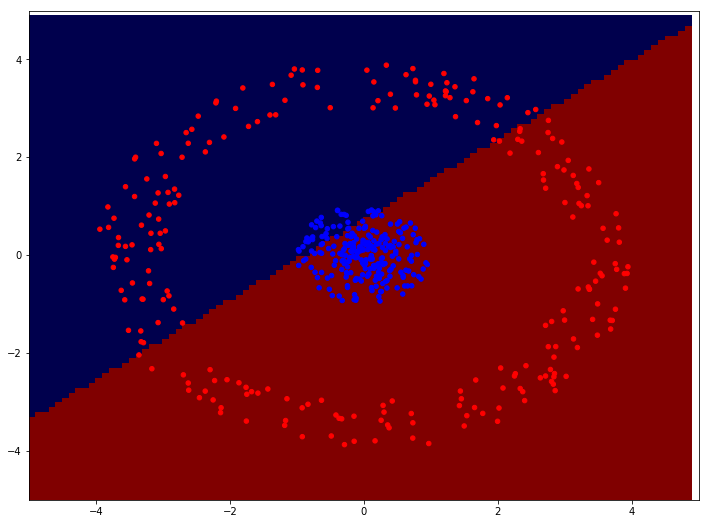

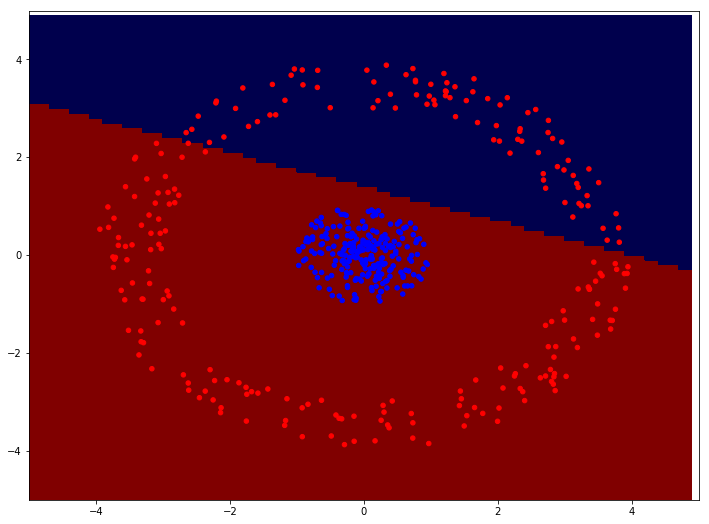

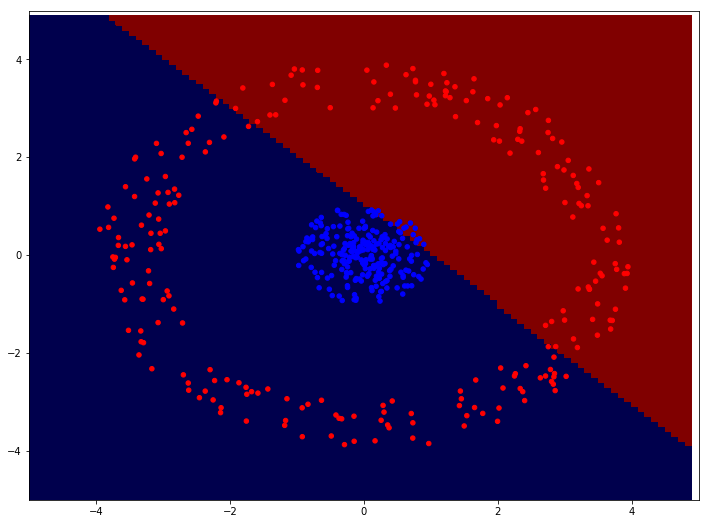

Epoch 5, accuracy=0.515


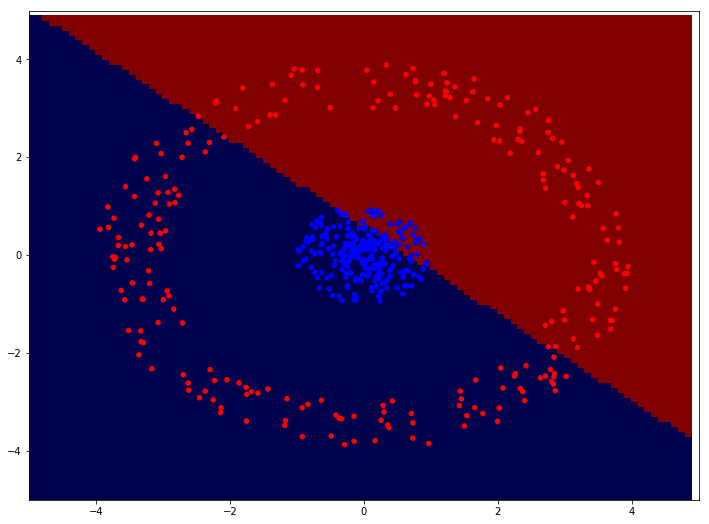

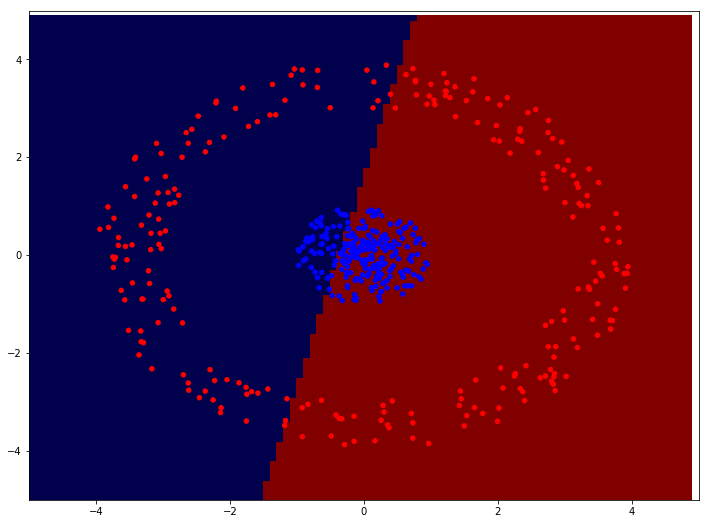

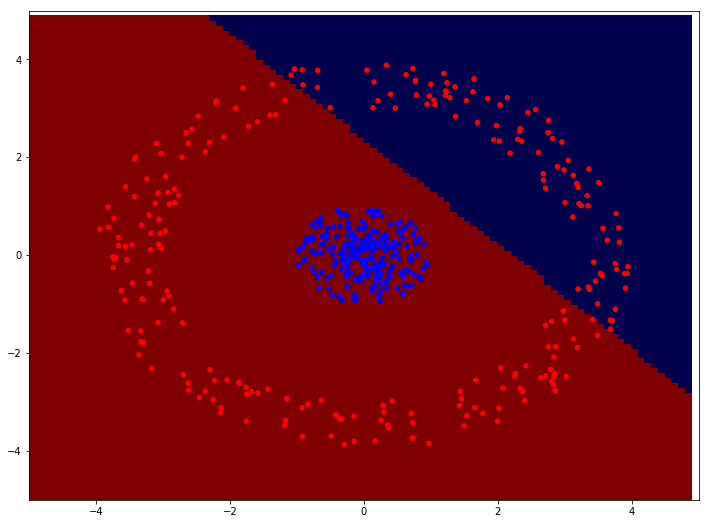

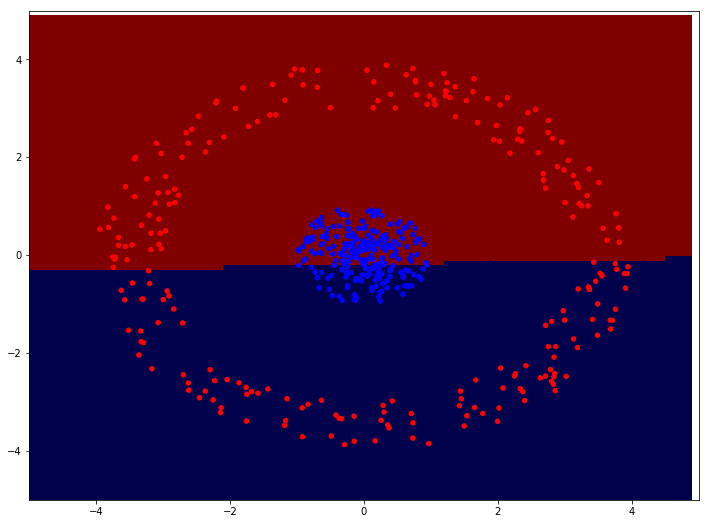

Epoch 6, accuracy=0.53


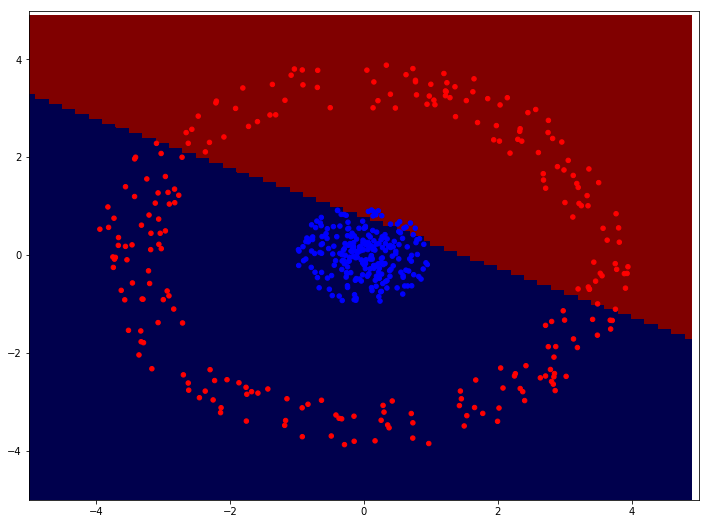

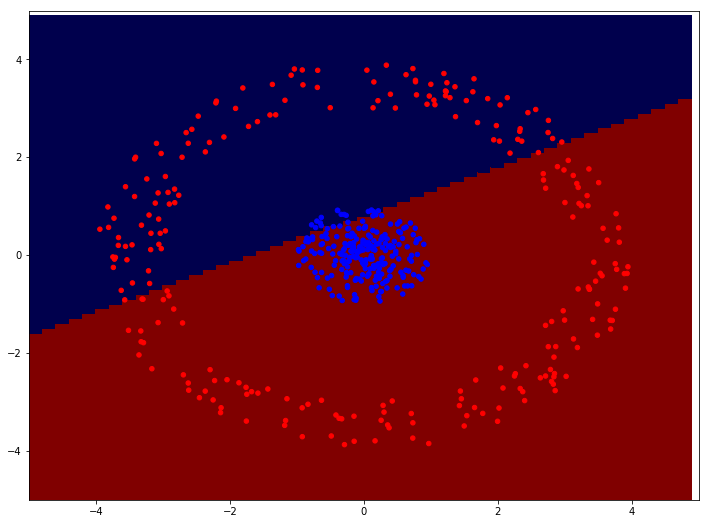

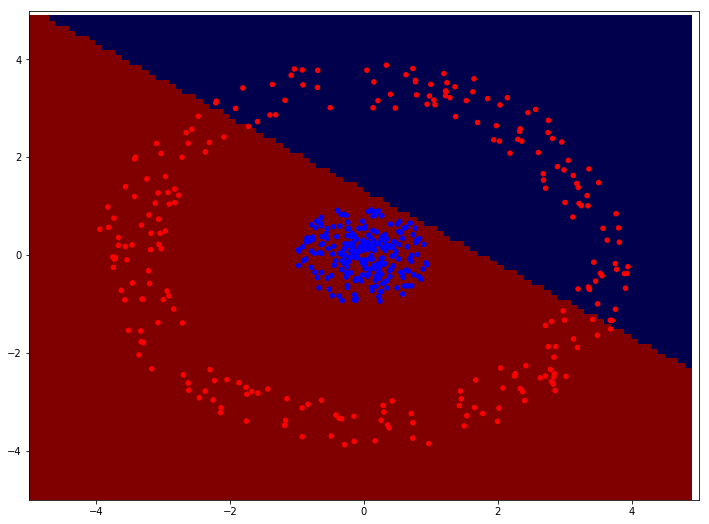

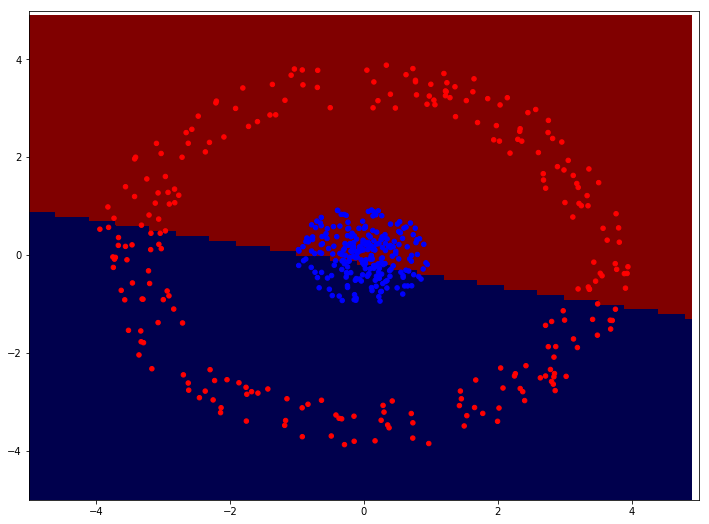

Epoch 7, accuracy=0.5025


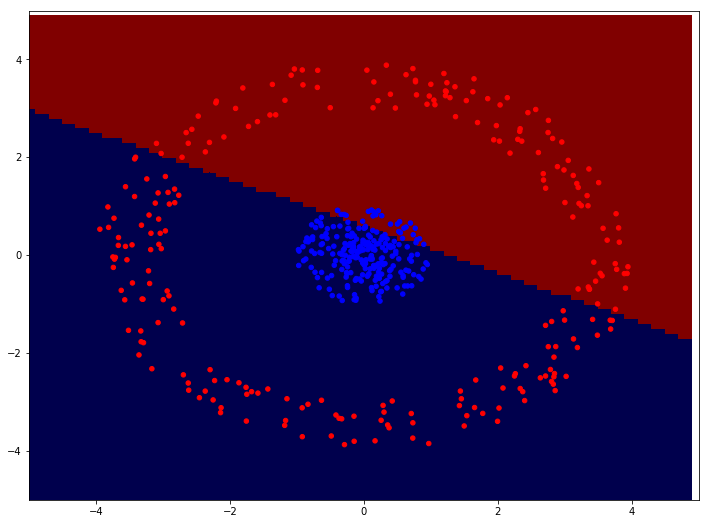

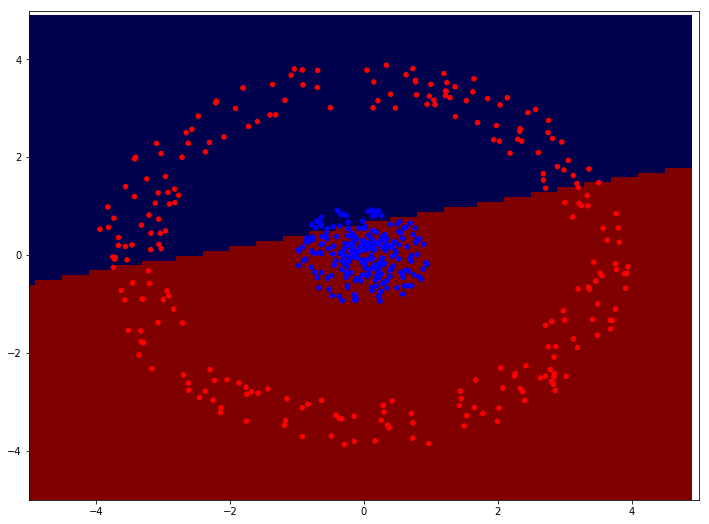

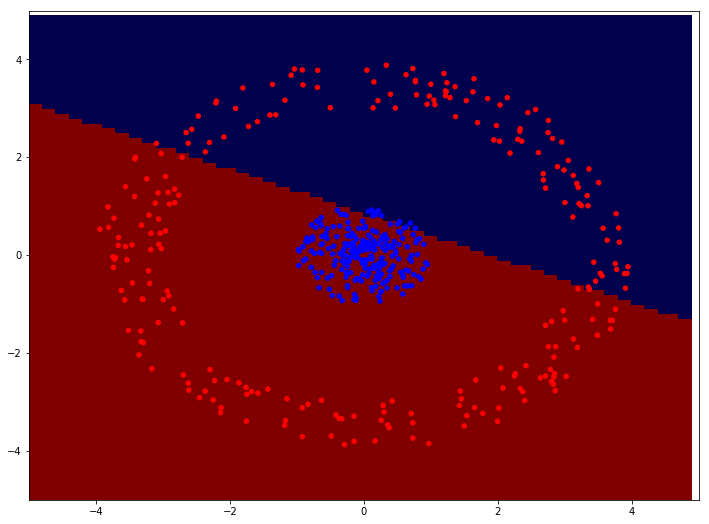

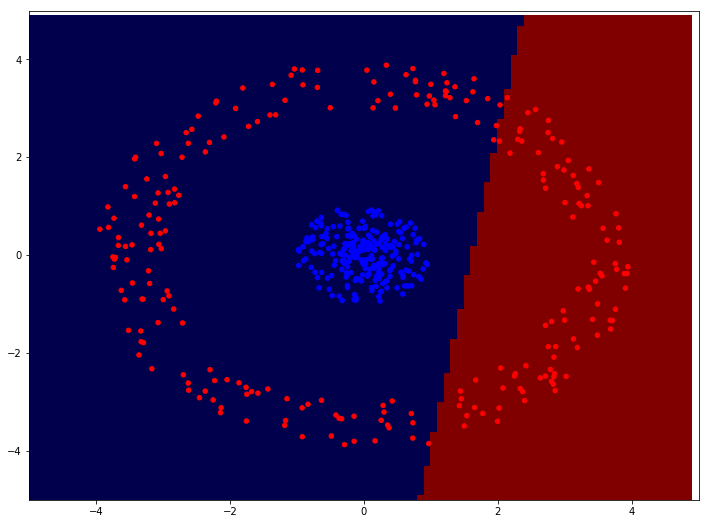

Epoch 8, accuracy=0.5425


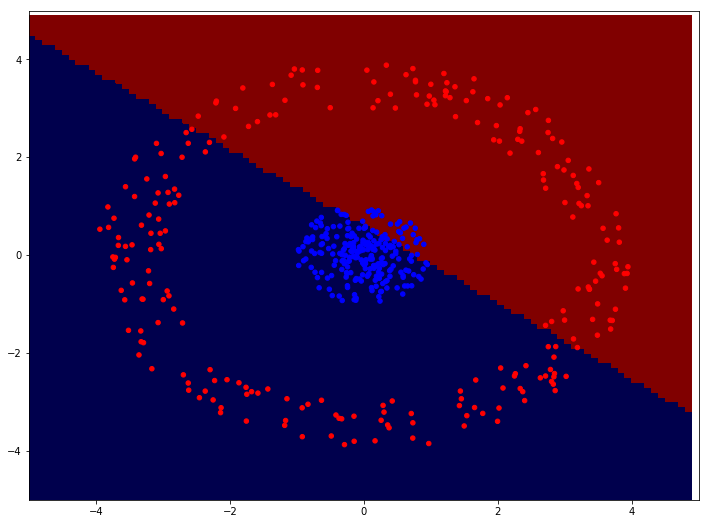

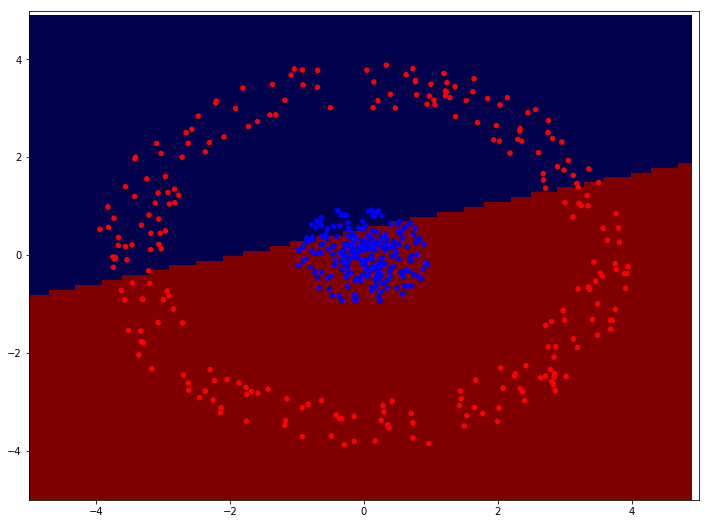

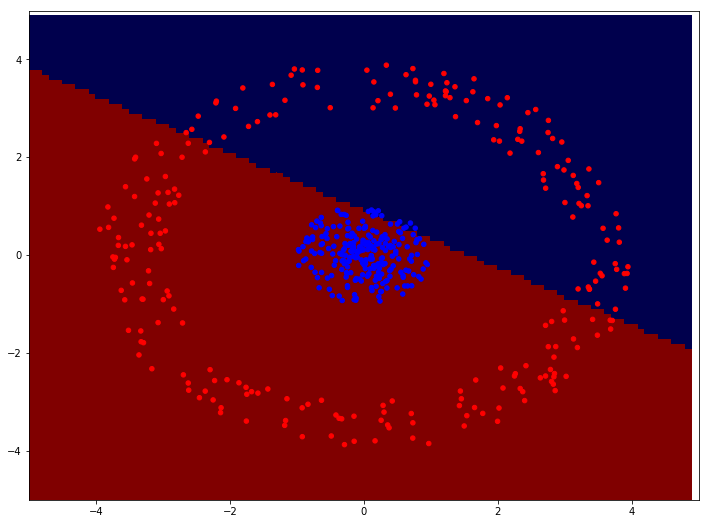

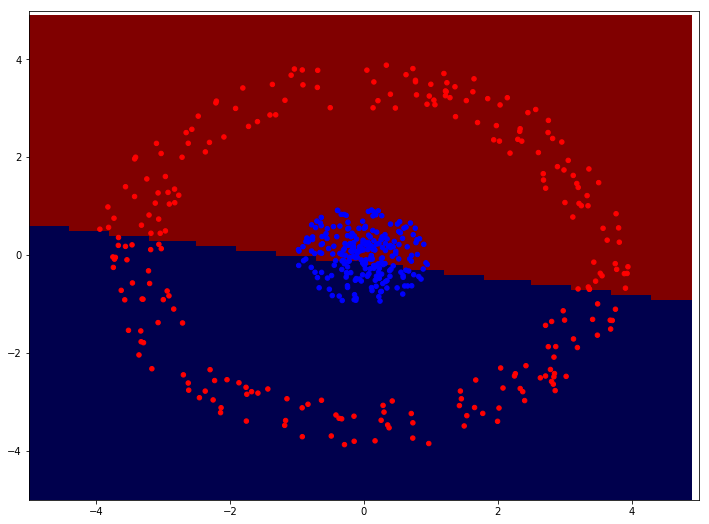

Epoch 9, accuracy=0.52


In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)
learning_rate = 0.01
plotme = True

reset_weights()

for e in range(10):
    count = 0
    correct, tot = 0, 0
    for xt, yt in zip(x_train, y_train):
        
        if predict_class_perceptron(xt) != yt:
            # TODO : remove here
            # update the model !
            dw, db = gradient(xt, yt)
            W -= learning_rate * dw
            b -= learning_rate * db
        else:
            correct += 1
        tot += 1
        
        if plotme and count % 100==0:
            plot_discriminator(predict_class_perceptron, x2, y2)
        count += 1
    print(f"Epoch {e}, accuracy={correct/tot}")
    
# Evaluate model on test set ! Compare with train set

## Multi Layer Perceptron (MLP) or Neural Network (NN)
![neuralnetwork](img/nn.jpeg)

Accumulation de perceptron dans des «couches», puis accumulation de «couches».

Les équations sont identiques à celles du perceptron. L'algorithme de propagation du gradient dans les couches est la «backpropagation»


In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

# Slight modification on labels
def one_hot(x):
    l = len(x)
    xx = np.zeros((l, 2))
    xx[np.arange(l), x] = 1
    return xx

y_train = one_hot(y_train)
y_test = one_hot(y_test)

# print(*((x, y) for x, y in zip(x_train, y_train)), sep='\n')


(array([-0.2379779 ,  0.53743954]), array([1., 0.]))
(array([ 3.53196817, -0.3703616 ]), array([0., 1.]))
(array([0.39911646, 0.63567228]), array([1., 0.]))
(array([ 0.30259013, -3.20749622]), array([0., 1.]))
(array([1.1972713, 3.7136032]), array([0., 1.]))
(array([-0.72777387, -0.34869242]), array([1., 0.]))
(array([-3.74680174, -0.03628144]), array([0., 1.]))
(array([ 0.65483793, -0.62881132]), array([1., 0.]))
(array([-3.21439522, -0.31989897]), array([0., 1.]))
(array([0.76949188, 0.55177577]), array([1., 0.]))
(array([-0.77901364,  0.62005804]), array([1., 0.]))
(array([-1.86380895, -2.60794805]), array([0., 1.]))
(array([ 2.33640077, -2.72528661]), array([0., 1.]))
(array([ 0.26673062, -0.38689084]), array([1., 0.]))
(array([-2.295014  , -2.34010696]), array([0., 1.]))
(array([2.56835787, 2.97807323]), array([0., 1.]))
(array([0.73858587, 0.41833135]), array([1., 0.]))
(array([-0.24353335, -0.62433372]), array([1., 0.]))
(array([ 0.07764526, -0.37895299]), array([1., 0.]))
(arra

Epoch 1/200
400/400 [==============================] - 1s 3ms/step - loss: 0.7667 - acc: 0.5125
Epoch 2/200
400/400 [==============================] - 0s 185us/step - loss: 0.7344 - acc: 0.5850
Epoch 3/200
400/400 [==============================] - 0s 192us/step - loss: 0.7099 - acc: 0.6275
Epoch 4/200
400/400 [==============================] - 0s 194us/step - loss: 0.6918 - acc: 0.6525
Epoch 5/200
400/400 [==============================] - 0s 182us/step - loss: 0.6780 - acc: 0.6800
Epoch 6/200
400/400 [==============================] - 0s 189us/step - loss: 0.6676 - acc: 0.6925
Epoch 7/200
400/400 [==============================] - 0s 185us/step - loss: 0.6591 - acc: 0.6925
Epoch 8/200
400/400 [==============================] - 0s 187us/step - loss: 0.6518 - acc: 0.6950
Epoch 9/200
400/400 [==============================] - 0s 189us/step - loss: 0.6453 - acc: 0.6950
Epoch 10/200
400/400 [==============================] - 0s 189us/step - loss: 0.6395 - acc: 0.6950
Epoch 11/200
400/400 

400/400 [==============================] - 0s 229us/step - loss: 0.0214 - acc: 1.0000
Epoch 166/200
400/400 [==============================] - 0s 229us/step - loss: 0.0208 - acc: 1.0000
Epoch 167/200
400/400 [==============================] - 0s 222us/step - loss: 0.0202 - acc: 1.0000
Epoch 168/200
400/400 [==============================] - 0s 219us/step - loss: 0.0196 - acc: 1.0000
Epoch 169/200
400/400 [==============================] - 0s 267us/step - loss: 0.0190 - acc: 1.0000
Epoch 170/200
400/400 [==============================] - 0s 189us/step - loss: 0.0185 - acc: 1.0000
Epoch 171/200
400/400 [==============================] - 0s 194us/step - loss: 0.0180 - acc: 1.0000
Epoch 172/200
400/400 [==============================] - 0s 192us/step - loss: 0.0175 - acc: 1.0000
Epoch 173/200
400/400 [==============================] - 0s 199us/step - loss: 0.0170 - acc: 1.0000
Epoch 174/200
400/400 [==============================] - 0s 192us/step - loss: 0.0166 - acc: 1.0000
Epoch 175/200


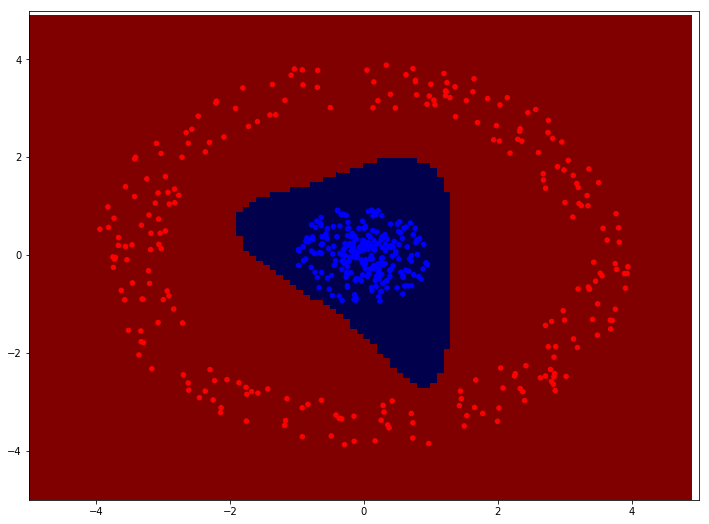

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation=tf.nn.tanh, input_shape=(2,)),
  tf.keras.layers.Dense(2, activation=tf.nn.tanh),
  tf.keras.layers.Dense(2, activation=tf.nn.tanh),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=16)

model.evaluate(x_test, y_test)

plot_discriminator(lambda x: np.argmax(model.predict(np.array([x,]))), x2, y2)

## Other algorithms

* KNN

* SVM

* Tree based

La librairie Sklearn contient beaucoup de modèles prêts à être utilisés

1.0


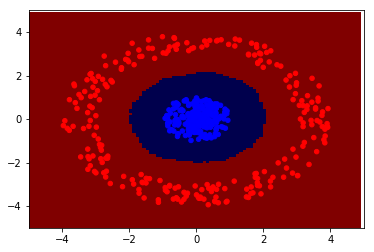

In [31]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: knn.predict([x])[0], x2, y2)

0.67


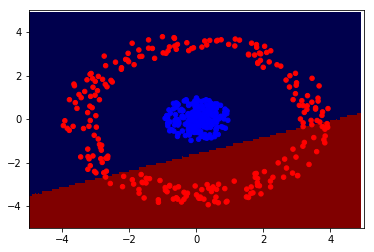

1.0


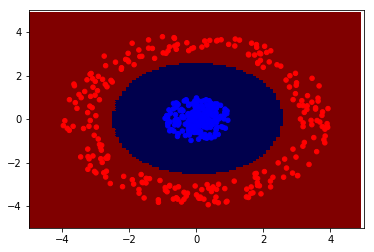

1.0


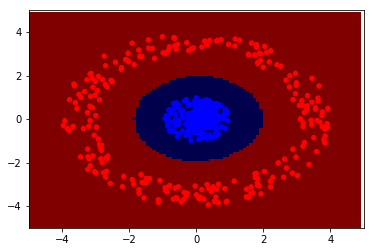

In [45]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)


# Linear Model
svc = SVC(kernel='linear', )
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: svc.predict([x])[0], x2, y2)

# Polynomial Modle
svc = SVC(kernel='poly', degree=4, gamma='scale')
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: svc.predict([x])[0], x2, y2)

# Exponential model
svc = SVC(kernel='rbf', gamma='scale')
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: svc.predict([x])[0], x2, y2)

0.99


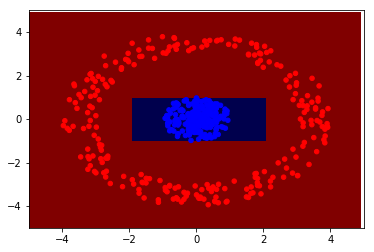

In [47]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)

pred = tree.predict(x_test)

print(np.mean(pred==y_test))
plot_discriminator(lambda x: tree.predict([x])[0], x2, y2)